In [1]:
!pip install opendatasets shap lightgbm xgboost prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import shap


In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: a
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india


100%|██████████| 72.9M/72.9M [00:00<00:00, 2.40GB/s]

In [4]:
df = pd.read_csv(
    "/content/air-quality-data-in-india/city_day.csv"
)
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


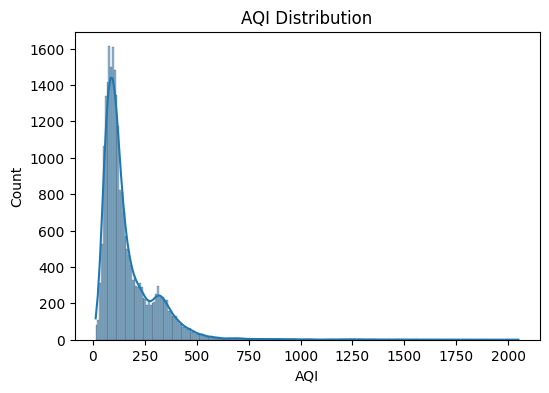

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['AQI'], kde=True)
plt.title("AQI Distribution")
plt.show()


In [8]:
features = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3'
]

df = df[features + ['AQI']]


In [9]:
df.fillna(df.median(), inplace=True)


In [10]:
X = df.drop('AQI', axis=1)
y = df['AQI']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [14]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [15]:
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)


In [16]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)


In [17]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))


In [18]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("SVR", y_test, y_pred_svr)



Linear Regression
MAE: 29.882355667171588
RMSE: 54.55127113273693
R2 Score: 0.8066940535932305

Random Forest
MAE: 20.17004072235215
RMSE: 42.203864686176686
R2 Score: 0.8842982552343439

XGBoost
MAE: 20.74800383227316
RMSE: 41.980379941607445
R2 Score: 0.8855203761209609

SVR
MAE: 31.04328346601352
RMSE: 73.53133894869111
R2 Score: 0.648779050496664


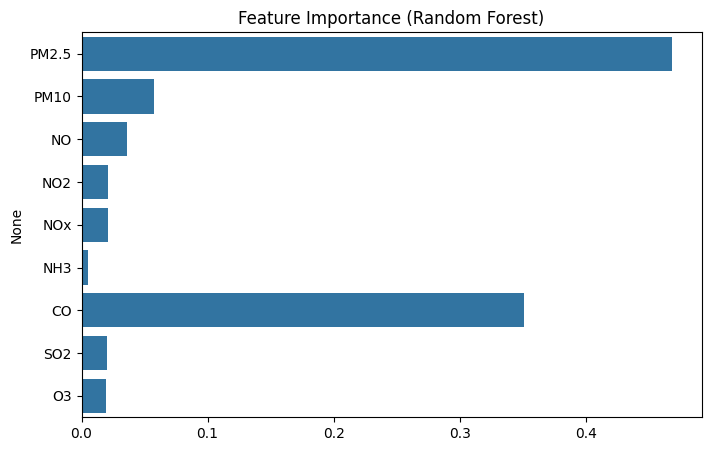

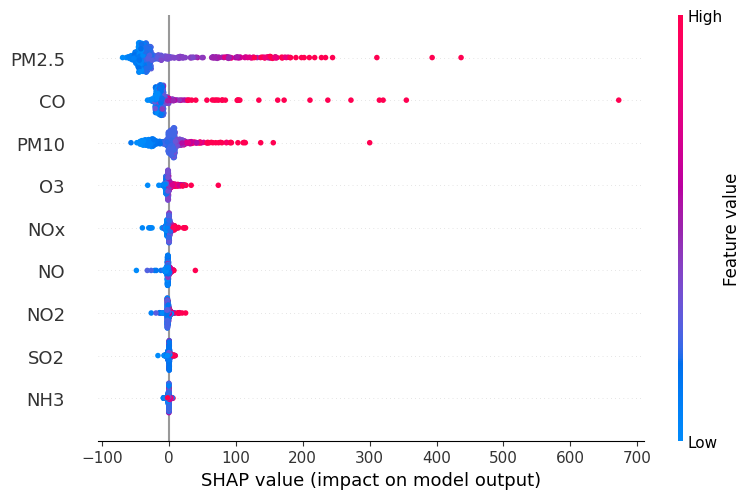

In [19]:
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.show()

# --------------------------
# explainer = shap.Explainer(rf, X_train)
# shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test)
# ----------------------------------
# explainer = shap.TreeExplainer(rf)

# shap_values = explainer.shap_values(
#     X_test,
#     check_additivity=False
# )

# shap.summary_plot(shap_values, X_test)

# -------------------------------
X_shap = X_test.sample(500, random_state=42)

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(
    X_shap,
    check_additivity=False
)

shap.summary_plot(shap_values, X_shap)


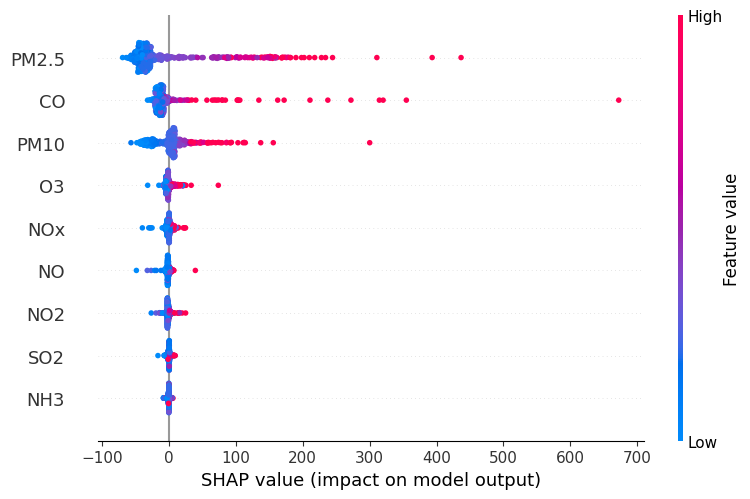

In [20]:
# explainer = shap.Explainer(rf, X_train)
# shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test)

import shap

# Use a smaller sample to speed things up
X_shap = X_test.sample(500, random_state=42)

# Explicit TreeExplainer
explainer = shap.TreeExplainer(rf)

# Disable additivity check (EXPECTED for RF)
shap_values = explainer.shap_values(
    X_shap,
    check_additivity=False
)

# Plot
shap.summary_plot(shap_values, X_shap)


In [21]:
df_ts = pd.read_csv(
    "/content/air-quality-data-in-india/city_day.csv"
)

df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts[['Date', 'AQI']].dropna()

df_ts = df_ts.groupby('Date').mean().reset_index()


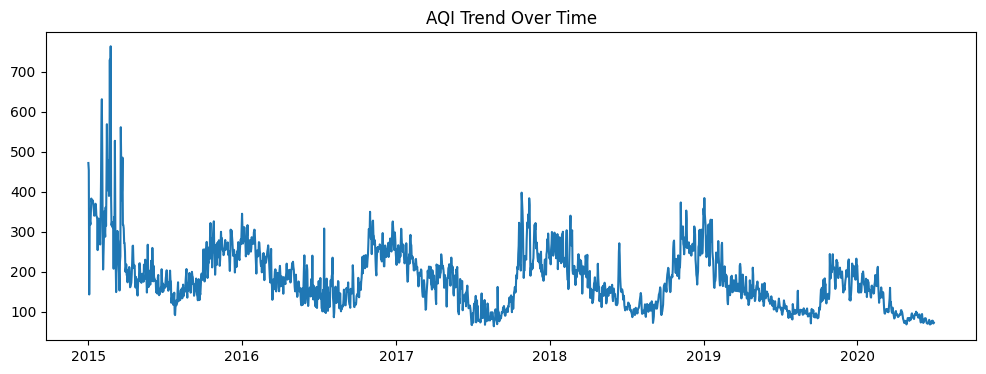

In [22]:
plt.figure(figsize=(12,4))
plt.plot(df_ts['Date'], df_ts['AQI'])
plt.title("AQI Trend Over Time")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


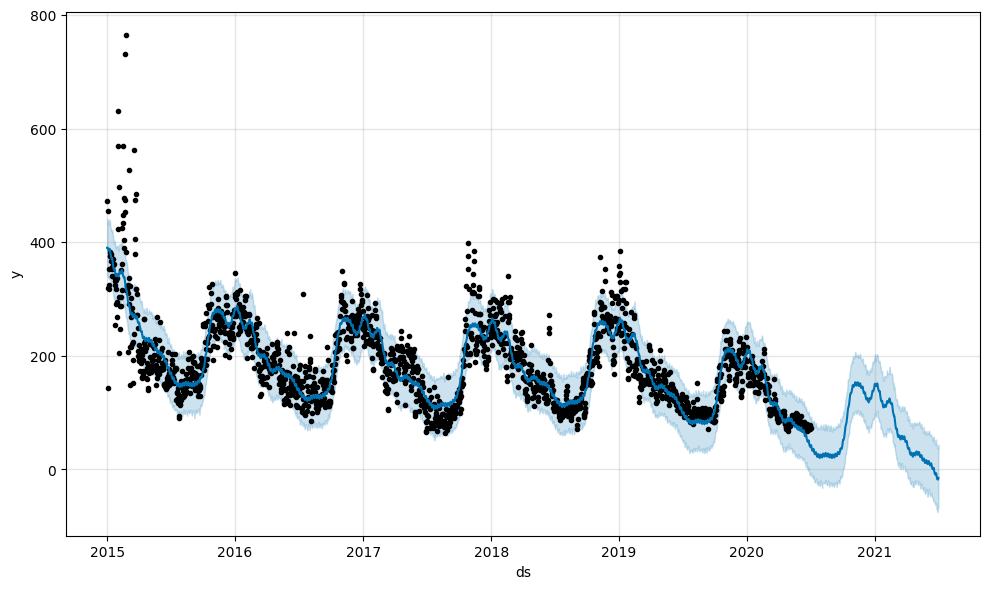

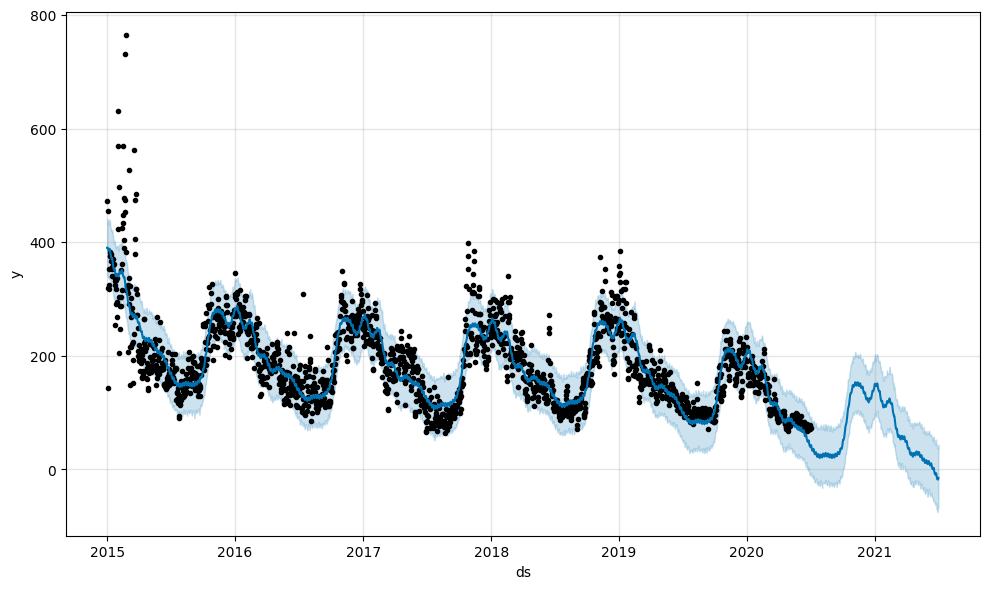

In [23]:
from prophet import Prophet

prophet_df = df_ts.rename(columns={'Date':'ds', 'AQI':'y'})

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

model.plot(forecast)
